##Import

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Exploratory Data Analysis (EDA)

***Earthquakes Data***

In [47]:
eq=pd.read_csv('/content/drive/My Drive/Data_science/Project/earthquake_data.csv')
eq

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,"M 7.7 - 28 km SSW of Puerto El Triunfo, El Sal...",7.7,13-01-2001 17:33,0,8,NaN,0,912,us,427,0.000,0.0,mwc,60.000,13.0490,-88.660,"Puerto El Triunfo, El Salvador",NaN,NaN
778,"M 6.9 - 47 km S of Old Harbor, Alaska",6.9,10-01-2001 16:02,5,7,NaN,0,745,ak,0,0.000,0.0,mw,36.400,56.7744,-153.281,"Old Harbor, Alaska",North America,NaN
779,"M 7.1 - 16 km NE of Port-Olry, Vanuatu",7.1,09-01-2001 16:49,0,7,NaN,0,776,us,372,0.000,0.0,mwb,103.000,-14.9280,167.170,"Port-Olry, Vanuatu",NaN,Vanuatu
780,"M 6.8 - Mindanao, Philippines",6.8,01-01-2001 08:54,0,5,NaN,0,711,us,64,0.000,0.0,mwc,33.000,6.6310,126.899,"Mindanao, Philippines",NaN,NaN


In [48]:
eq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      782 non-null    object 
 1   magnitude  782 non-null    float64
 2   date_time  782 non-null    object 
 3   cdi        782 non-null    int64  
 4   mmi        782 non-null    int64  
 5   alert      415 non-null    object 
 6   tsunami    782 non-null    int64  
 7   sig        782 non-null    int64  
 8   net        782 non-null    object 
 9   nst        782 non-null    int64  
 10  dmin       782 non-null    float64
 11  gap        782 non-null    float64
 12  magType    782 non-null    object 
 13  depth      782 non-null    float64
 14  latitude   782 non-null    float64
 15  longitude  782 non-null    float64
 16  location   777 non-null    object 
 17  continent  206 non-null    object 
 18  country    484 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 1

In [49]:
eq.shape

(782, 19)

In [50]:
eq.describe()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,0.388747,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199
std,0.445514,3.169939,1.462724,0.487778,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886
min,6.500000,0.000000,1.000000,0.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000
25%,6.600000,0.000000,5.000000,0.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050
50%,6.800000,5.000000,6.000000,0.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000
75%,7.100000,7.000000,7.000000,1.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000
max,9.100000,9.000000,9.000000,1.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000


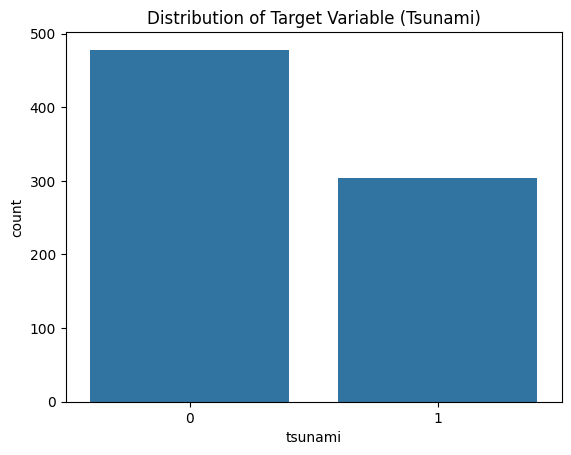

In [51]:
# Explore target distribution
sns.countplot(x='tsunami', data=eq)
plt.title('Distribution of Target Variable (Tsunami)')
plt.show()

##Preprocess Data##

**แปลงข้อมูลจากข้อความเป็นตัวเลข**

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
le_alert=LabelEncoder()
le_net=LabelEncoder()
le_magType=LabelEncoder()
le_location=LabelEncoder()
le_continent=LabelEncoder()
le_country=LabelEncoder()

In [54]:
#แปลงข้อมูล
alert_en=le_alert.fit_transform(eq['alert'])
net_en=le_net.fit_transform(eq['net'])
magType_en=le_magType.fit_transform(eq['magType'])
location_en=le_location.fit_transform(eq['location'])
continent_en=le_continent.fit_transform(eq['continent'])
country_en=le_country.fit_transform(eq['country'])

In [55]:
#ใส่ข้อมูลเข้าไปใหม่ในตาราง
eq['alert_en']=alert_en
eq['net_en']=net_en
eq['magType_en']=magType_en
eq['location_en']=location_en
eq['continent_en']=continent_en
eq['country_en']=country_en

In [56]:
eq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         782 non-null    object 
 1   magnitude     782 non-null    float64
 2   date_time     782 non-null    object 
 3   cdi           782 non-null    int64  
 4   mmi           782 non-null    int64  
 5   alert         415 non-null    object 
 6   tsunami       782 non-null    int64  
 7   sig           782 non-null    int64  
 8   net           782 non-null    object 
 9   nst           782 non-null    int64  
 10  dmin          782 non-null    float64
 11  gap           782 non-null    float64
 12  magType       782 non-null    object 
 13  depth         782 non-null    float64
 14  latitude      782 non-null    float64
 15  longitude     782 non-null    float64
 16  location      777 non-null    object 
 17  continent     206 non-null    object 
 18  country       484 non-null    

##Feature Importance##

In [63]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
# แบ่งข้อมูลเป็น features และ target
X = eq.drop(['title', 'date_time', 'alert', 'net', 'magType', 'location', 'continent', 'country','tsunami'], axis=1)
y = eq['tsunami']

In [64]:
# สร้างและฝึกโมเดล RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X, y)

RandomForestClassifier(random_state=42)

In [65]:
# หาค่าความสำคัญของคุณสมบัติ
feature_importances = rf_classifier.feature_importances_

In [66]:
# สร้าง DataFrame เพื่อแสดงค่าความสำคัญของคุณสมบัติ
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

In [67]:
feature_importance_df

,Feature,Importance
0,magnitude,0.025141
1,cdi,0.021389
2,mmi,0.021324
3,sig,0.031382
4,nst,0.099289
5,dmin,0.165238
6,gap,0.031250
7,depth,0.042967
8,latitude,0.054857
9,longitude,0.112903


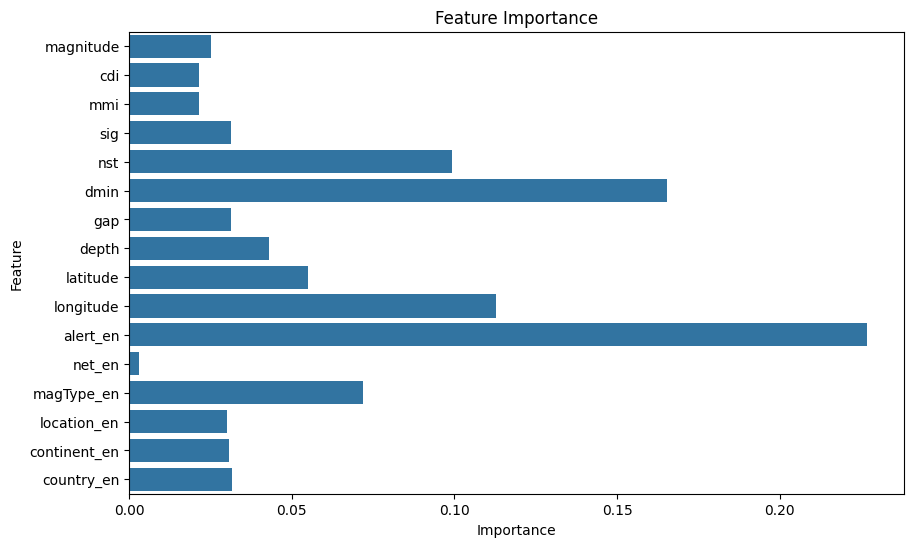

In [68]:
import seaborn as sns

# แสดงค่าความสำคัญของคุณสมบัติเป็นกราฟ
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [69]:
# เลือกเฉพาะ 5 คุณสมบัติที่มีค่า Importance มากที่สุด
top_5_features = feature_importance_df.nlargest(5, 'Importance')

# แสดงชื่อคุณสมบัติที่เลือก
print("Selected features:")
print(top_5_features)

Selected features:
       Feature  Importance
10    alert_en    0.226955
5         dmin    0.165238
9    longitude    0.112903
4          nst    0.099289
12  magType_en    0.071947


In [70]:
# เลือกเฉพาะคุณสมบัติที่สำคัญเพื่อสร้าง X
X = eq[top_5_features['Feature']]
# ใช้ 'tsunami' เป็นตัวแปรตาม (target variable)
y = eq['tsunami']

###Split Data into Train and Test Sets###

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
# Create and Train Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

###Cross Validation###

In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
# Perform Cross-Validation
cv_scores = cross_val_score(logistic_model, X_train, y_train, cv=5)

In [76]:
#Display Cross-Validation Scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.832 0.784 0.776 0.776 0.824]
Mean CV Score: 0.7984


###Model Logistic Regression ###


In [27]:
# สร้างโมเดล Logistic Regression และฝึกโมเดลด้วยชุดข้อมูลการฝึก
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [28]:
# ใช้โมเดลที่ฝึกไว้เพื่อทำนายผลลัพธ์ของชุดข้อมูลทดสอบ
y_pred = logistic_model.predict(X_test)

In [91]:
# ประเมินประสิทธิภาพของโมเดล
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [92]:
# ใช้ Cross Validation เพื่อประเมินความแม่นยำของโมเดลโดยใช้ K-fold Cross Validation ที่ k=5
scores = cross_val_score(logistic_model, X, y, cv=5)

In [93]:
# Perform cross-validation
y_train_pred_cv = cross_val_predict(logistic_model, X_train, y_train, cv=5)

In [94]:
# Display Cross-Validation Scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.832 0.784 0.776 0.776 0.824]
Mean CV Score: 0.7984


###Evaluate Model

In [104]:
# Make predictions on the test set
y_test_pred = logistic_model.predict(X_test)
y_test_pred

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1])

In [107]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_train, y_train_pred_cv)
precision = precision_score(y_train, y_train_pred_cv)
recall = recall_score(y_train, y_train_pred_cv)
f1 = f1_score(y_train, y_train_pred_cv)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.7984
Precision: 0.7153846153846154
Recall: 0.7815126050420168
F1-Score: 0.7469879518072289


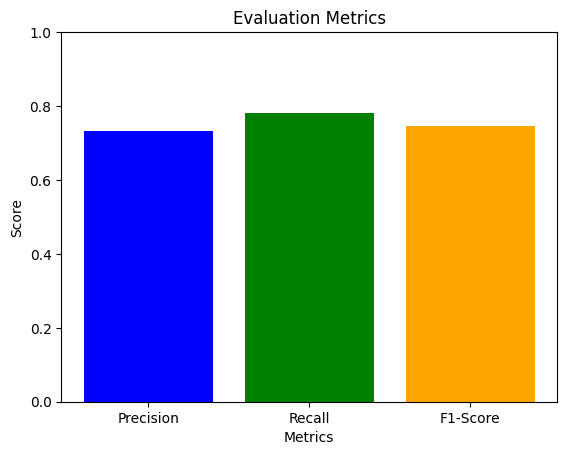

In [114]:
# ค่า Precision, Recall, และ F1-Score
scores = [Precision, recall, f1]
labels = ['Precision', 'Recall', 'F1-Score']

# พล็อตกราฟ
plt.bar(labels, scores, color=['blue', 'green', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Evaluation Metrics')
plt.ylim([0, 1])  # ตั้งค่าเพื่อให้แกน y อยู่ระหว่าง 0 ถึง 1
plt.show()

In [108]:
# Confusion Matrix
# Generate confusion matrix
conf_matrix = confusion_matrix(y_train, y_train_pred_cv)
conf_matrix

array([[313,  74],
       [ 52, 186]])

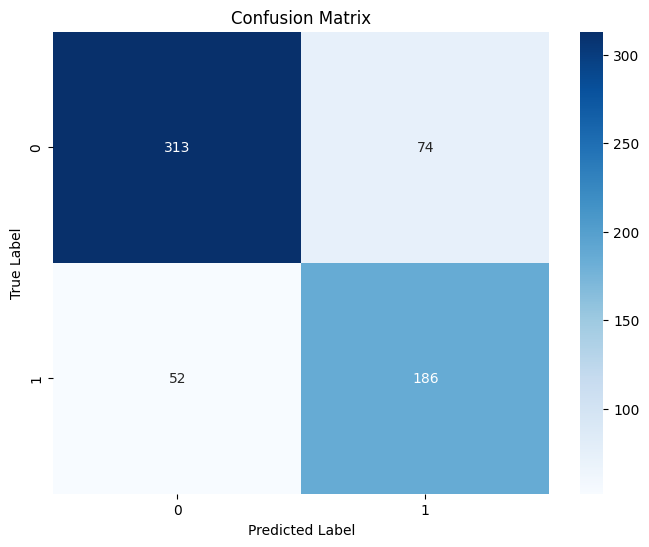

In [98]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

([<matplotlib.axis.YTick at 0x7d1bff70cbb0>,
 [Text(0, 0, 'No Tsunami'), Text(0, 1, 'Tsunami')])

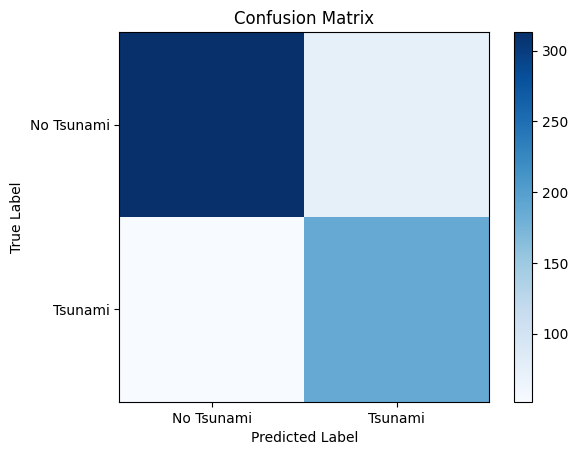

In [100]:
#Plot Confusion Matrix
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['No Tsunami', 'Tsunami'])
plt.yticks([0, 1], ['No Tsunami', 'Tsunami'])

***บันทึกโมเดลเป็นไฟล์***

In [42]:
import joblib

# บันทึกโมเดลเป็นไฟล์
joblib.dump(logistic_model, 'logistic_model.pkl')

['logistic_model.pkl']

In [44]:
# โหลดโมเดลจากไฟล์
logistic_model = joblib.load('logistic_model.pkl')